# Processing Steps
- remove data with NaN values
- retrieve geospatial coordinates for the respective stations from the stations file
- 

In [1]:
import pandas as pd

# Load the CSV data into a DataFrame
file_path = '../data/bikeshare-ridership-2024/Bike share ridership 2024-06.csv'

ridership_table = pd.read_csv("../data/bikeshare-ridership-2024/Bike share ridership 2024-01.csv")

# Display the first few rows of the DataFrame
ridership_table.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,26682740,528,7041,01/01/2024 00:00,Edward St / Yonge St,7130.0,01/01/2024 00:08,Davenport Rd / Bedford Rd,7855,Casual Member
1,26682742,1924,7245,01/01/2024 00:02,Tecumseth St / Queen St W - SMART,7259.0,01/01/2024 00:34,Lower Spadina Ave / Lake Shore Blvd,2453,Casual Member
2,26682743,2741,7052,01/01/2024 00:03,Wellington St W / Bay St,7366.0,01/01/2024 00:49,Fort York Blvd / Bathurst St SMART,7332,Casual Member
3,26682744,353,7041,01/01/2024 00:03,Edward St / Yonge St,7418.0,01/01/2024 00:09,College Park - Yonge St Entrance,782,Casual Member
4,26682746,2118,7721,01/01/2024 00:04,NaN,7721.0,01/01/2024 00:40,NaN,1008,Casual Member


In [2]:
# Print the column headers of the bike_share_data DataFrame
print(ridership_table.columns)
row_names = ['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type']

Index(['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type'],
      dtype='object')


In [3]:
# get average trip duration
average_trip_duration_min = ridership_table['Trip  Duration'].mean() / 60
print(f"Average trip duration: {average_trip_duration_min:.2f} minutes")

Average trip duration: 14.61 minutes


In [4]:
from analysis import *

def calc_capacities():
    pass
    # todo
    # assume num_bikes_t0
    # assume capacity = max(num_bikes(t) over t) - min(num_bikes(t) over t)
    # num_bikes_t0 = -min(num_bikes(t) over t)
    # 

def visualize_heatmap(t):
    pass
    # todo
    # (folium)
    # create map with all stations
    # color stations by difference between max(capacity and bikes(t), bikes(t))

In [5]:
bike_share_data = BikeShareData("2024-1")
bike_share_data.load_data(ridership_table)
bike_share_data.save_pickle()

In [6]:
bike_share_data.calc_capacities()

Text(0.5, 1.0, 'Distribution of Trip Durations')

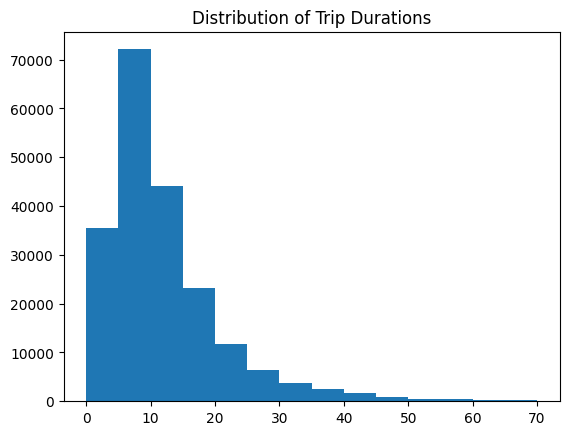

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a histogram of the trip durations
plt.hist(ridership_table['Trip  Duration'] / 60, bins=range(0, 75, 5))
plt.title('Distribution of Trip Durations')

In [8]:
one_station = bike_share_data.stations[list(bike_share_data.stations.keys())[0]]
print(one_station)
print(one_station.num_bikes)

BikeStation(station_id=7041, name='Edward St / Yonge St', lat=nan, lon=nan, capacity=np.int64(84), num_bikes_t0=np.int64(7), num_bikes=<analysis.SparseSequence object at 0x76a38298a4e0>)
